In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skqlearn.encoding import *
from skqlearn.jobhandler import JobHandler
from sklearn.datasets import make_blobs
from sklearn import svm
from qiskit.providers.aer import AerSimulator

plt.rcParams["figure.figsize"] = (8,8)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [2]:
def plot_cluster(axis, x, labels, centers):
    # Plot each of the clusters
    legend_list = []
    for y in np.unique(labels):
        members = labels == y
        axis.scatter(x[members, 0], x[members, 1])
        axis.scatter(centers[y, 0], centers[y, 1], s=[100], marker='X')
        legend_list.append(f'Data for cluster {y}')
        legend_list.append(f'Center for cluster {y}')

    axis.legend(legend_list)

In [3]:
def plot_boundaries(clfs, titles, x, labels, step):
    # create a mesh to plot in
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

    for i in range(len(clfs)):
        plt.subplot(len(clfs), 1, i+1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clfs[i].predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(x[:, 0], x[:, 1], c=labels, cmap=plt.cm.coolwarm)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

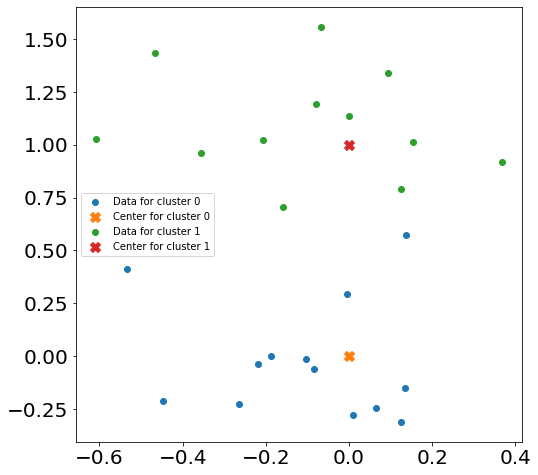

In [4]:
# Generate sample data
np.random.seed(2)
centers = np.array([[0,0], [0,1]])
n_clusters = centers.shape[0]
x, labels = make_blobs(n_samples=25, centers=centers, cluster_std=0.25)

plot_cluster(plt, x, labels, centers)

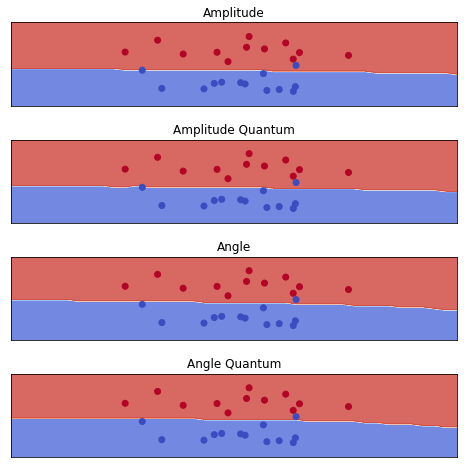

In [5]:
JobHandler().configure(backend=AerSimulator(), shots=50000)

# Amplitude Encoding
clf_amp = svm.SVC(kernel=ExpandedAmplitudeEncoding().classic_kernel).fit(x, labels)
clf_amp_q = svm.SVC(kernel=ExpandedAmplitudeEncoding().quantum_kernel).fit(x, labels)
# Angle Encoding
clf_ang = svm.SVC(kernel=AngleEncoding().classic_kernel).fit(x, labels)
clf_ang_q = svm.SVC(kernel=AngleEncoding().quantum_kernel).fit(x, labels)

plot_boundaries([clf_amp, clf_amp_q, clf_ang, clf_ang_q], ['Amplitude', 'Amplitude Quantum', 'Angle', 'Angle Quantum'], x, labels, 0.05)
